In [102]:
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
import seaborn as sns

In [103]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [104]:
dataset = pd.read_csv('./data/bg-car-offers.csv')

In [105]:
dataset.sample(15)

Make        Model Body type  Month of manufacture  \
68125             VW       Touran       Ван                  8.00   
74352           Audi           A6     Седан                  3.00   
82994        Peugeot       Expert   Миниван                 11.00   
69080             VW     Alltrack     Комби                  9.00   
59293          Volvo         Xc90      Джип                  7.00   
9213         Citroen           C3    Хечбек                 10.00   
81776         Toyota  Yaris verso   Миниван                 10.00   
13049         Toyota      Avensis     Комби                 10.00   
18025         Nissan      Qashqai      Джип                  5.00   
12181  Mercedes-Benz      C-класа     Комби                  2.00   
79423           Seat         Leon    Хечбек                 10.00   
66536          Mazda            6     Комби                  9.00   
23704             VW         Polo    Хечбек                  7.00   
95500            BMW      7-серия     Седан                  2.00   
37808           Audi           A3    Хечбек                 12.00   

       Year of manufacture Fuel type Transmission  Engine size  Horsepower  \
68125              2013.00   Дизелов  Автоматична          NaN      105.00   
74352              2009.00   Дизелов  Автоматична      3000.00      239.00   
82994              2014.00   Дизелов        Ръчна      2000.00      128.00   
69080              2014.00  Бензинов        Ръчна      1798.00      160.00   
59293              2004.00   Дизелов  Автоматична          NaN      163.00   
9213               2003.00  Бензинов        Ръчна      1100.00       60.00   
81776              2004.00   Дизелов        Ръчна      1400.00       75.00   
13049              2005.00   Дизелов        Ръчна          NaN      177.00   
18025              2014.00   Дизелов  Автоматична      1600.00      130.00   
12181              2012.00   Дизелов  Автоматична          NaN      170.00   
79423              2009.00  Бензинов        Ръчна      2000.00      211.00   
66536              2009.00  Бензинов        Ръчна      2500.00      170.00   
23704              2003.00  Бензинов        Ръчна      1200.00       68.00   
95500              2014.00   Дизелов  Автоматична          NaN      388.00   
37808              2007.00   Дизелов  Автоматична      2000.00      170.00   

      Euro standard  ...                                   Comfort features  \
68125           NaN  ...  Steptronic, Tiptronic, Бордкомпютър, Датчик за...   
74352        Евро 4  ...  Ел. Огледала, Ел. Стъкла, Ел. регулиране на се...   
82994        Евро 5  ...  Блокаж на диференциала, Бордкомпютър, Ел. Огле...   
69080        Евро 5  ...  Bluetooth \ handsfree система, USB, audio\vide...   
59293        Евро 3  ...  Бордкомпютър, Ел. Огледала, Ел. Стъкла, Ел. ре...   
9213            NaN  ...   Бордкомпютър, Ел. Огледала, Ел. Стъкла, Климатик   
81776           NaN  ...  Бордкомпютър, Ел. Огледала, Ел. Стъкла, Климат...   
13049           NaN  ...  Ел. Огледала, Ел. Стъкла, Климатроник, Мултифу...   
18025        Евро 5  ...  Bluetooth \ handsfree система, USB, audio\vide...   
12181           NaN  ...  Auto Start Stop function, Bluetooth \ handsfre...   
79423           NaN  ...                                                NaN   
66536        Евро 3  ...  USB, audio\video, IN\AUX изводи, Ел. Огледала,...   
23704        Евро 3  ...  Ел. Огледала, Ел. Стъкла, Климатик, Стерео уредба   
95500           NaN  ...                                                NaN   
37808        Евро 4  ...  Steptronic, Tiptronic, USB, audio\video, IN\AU...   

                                          Other features  \
68125                                   Лизинг, Нов внос   
74352               4x4, Напълно обслужен, С регистрация   
82994              7 места, Дълга база, Лизинг, Нов внос   
69080                     С регистрация, Сервизна книжка   
59293                                 4x4, С регистрация   
9213                     Напълно обсл

In [106]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99802 entries, 0 to 99801
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Make                        99802 non-null  object 
 1   Model                       99802 non-null  object 
 2   Body type                   99802 non-null  object 
 3   Month of manufacture        99644 non-null  float64
 4   Year of manufacture         99644 non-null  float64
 5   Fuel type                   99802 non-null  object 
 6   Transmission                99802 non-null  object 
 7   Engine size                 73476 non-null  float64
 8   Horsepower                  94382 non-null  float64
 9   Euro standard               77756 non-null  object 
 10  Mileage                     99390 non-null  float64
 11  Miles per full charge (EV)  2724 non-null   float64
 12  Battery capacity (EV)       2724 non-null   float64
 13  Color                       946

In [107]:
dataset.shape

(99802, 27)

In [108]:
dataset.describe(include='all')

Make  Model Body type  Month of manufacture  \
count           99802  99802     99802              99644.00   
unique            112   1403        11                   NaN   
top     Mercedes-Benz   Golf      Джип                   NaN   
freq            13698   2488     26208                   NaN   
mean              NaN    NaN       NaN                  6.62   
std               NaN    NaN       NaN                  3.52   
min               NaN    NaN       NaN                  1.00   
25%               NaN    NaN       NaN                  4.00   
50%               NaN    NaN       NaN                  7.00   
75%               NaN    NaN       NaN                 10.00   
max               NaN    NaN       NaN                 12.00   

        Year of manufacture Fuel type Transmission  Engine size  Horsepower  \
count              99644.00     99802        99802     73476.00    94382.00   
unique                  NaN         5            3          NaN         NaN   
top                     NaN   Дизелов  Автоматична          NaN         NaN   
freq                    NaN     54136        51375          NaN         NaN   
mean                2010.76       NaN          NaN      2216.49      186.97   
std                    7.03       NaN          NaN      1433.04      125.40   
min                 1931.00       NaN          NaN         1.00        1.00   
25%                 2006.00       NaN          NaN      1600.00      110.00   
50%                 2011.00       NaN          NaN      2000.00      150.00   
75%                 2016.00       NaN          NaN      2500.00      224.00   
max                 2024.00       NaN          NaN     62000.00     2400.00   

       Euro standard  ...                    Comfort features  Other features  \
count          77756  ...                               85698           83950   
unique             6  ...                               47854            2339   
top           Евро 6  ...  Ел. Огледала, Ел. Стъкла, Климатик        Нов внос   
freq           27127  ...                                 404            5707   
mean             NaN  ...                                 NaN             NaN   
std              NaN  ...                                 NaN             NaN   
min              NaN  ...                                 NaN             NaN   
25%              NaN  ...                                 NaN             NaN   
50%              NaN  ...                                 NaN             NaN   
75%              NaN  ...                                 NaN             NaN   
max              NaN  ...                                 NaN             NaN   

                                        Exterior features  \
count                                               84316   
unique                                               1639   
top     4(5) Врати, Лети джанти, Металик, Халогенни фа...   
freq                                                 7214   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                   Security features Interior features Specialised features  \
count                          75944             44907                 1890   
unique                            43                 7                   11   
top     Аларма, Централно заключване       Кожен салон       Хомологация N1   
freq                           35996             35459                 1267   
mean                             NaN               NaN                  NaN   
std                              NaN               NaN                  NaN   
min                              NaN    

In [109]:
null_counts_per_column = dataset.isnull().sum().sort_values(ascending=False)
null_counts_per_column

Specialised features          97912
Miles per full charge (EV)    97078
Battery capacity (EV)         97078
VIN                           89660
Interior features             54895
Engine size                   26326
Security features             23858
Euro standard                 22046
Safety features               17482
Other features                15852
Exterior features             15486
Comfort features              14104
Horsepower                     5420
Color                          5169
Mileage                         412
Year of manufacture             158
Month of manufacture            158
City                              3
Region                            2
View count                        0
Make                              0
Price                             0
Model                             0
Transmission                      0
Fuel type                         0
Body type                         0
Offer title                       0
dtype: int64

In [110]:
fig = sns.barplot(x=null_counts_per_column, y=null_counts_per_column.index)
fig.set_title('Count of missing values per column')
fig.set_xlabel('Count of missing values')
fig.set_ylabel('Column')

Text(0, 0.5, 'Column')

<Axes: >

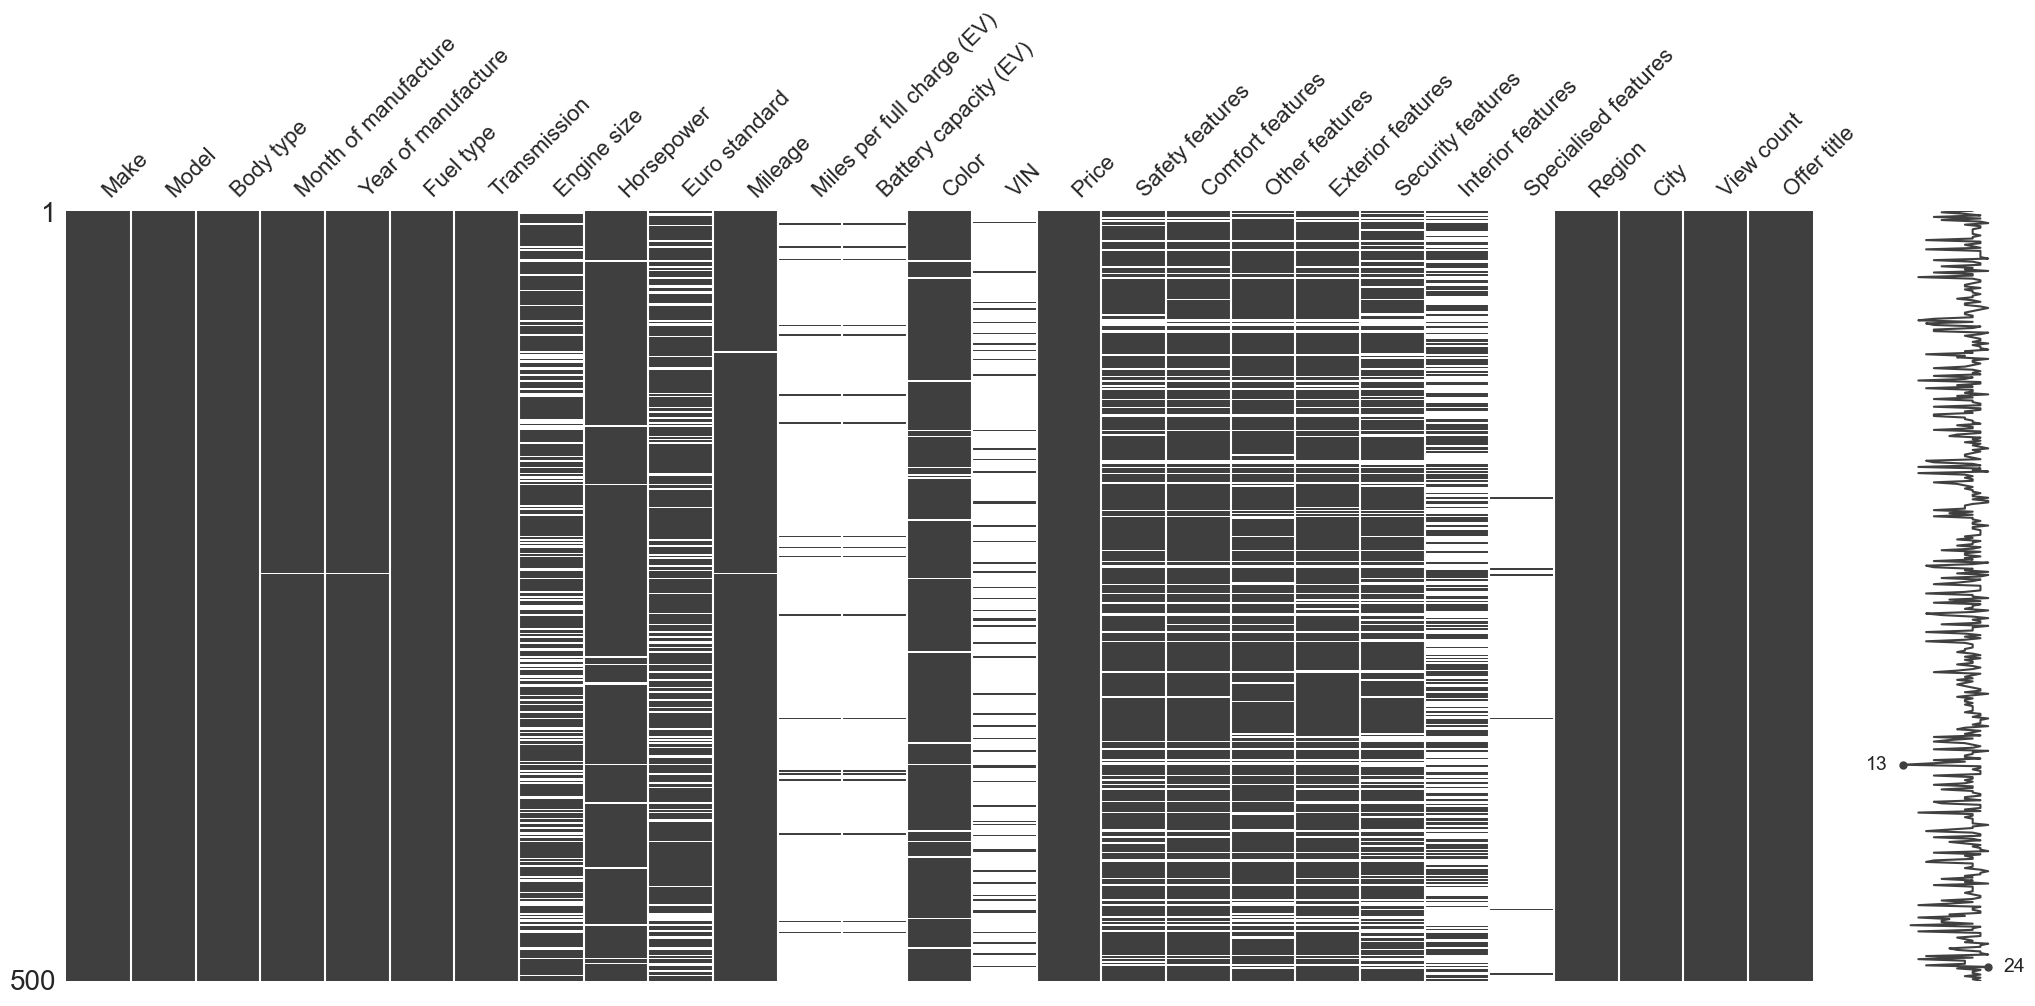

In [111]:
msno.matrix(dataset.sample(500))

<Axes: >

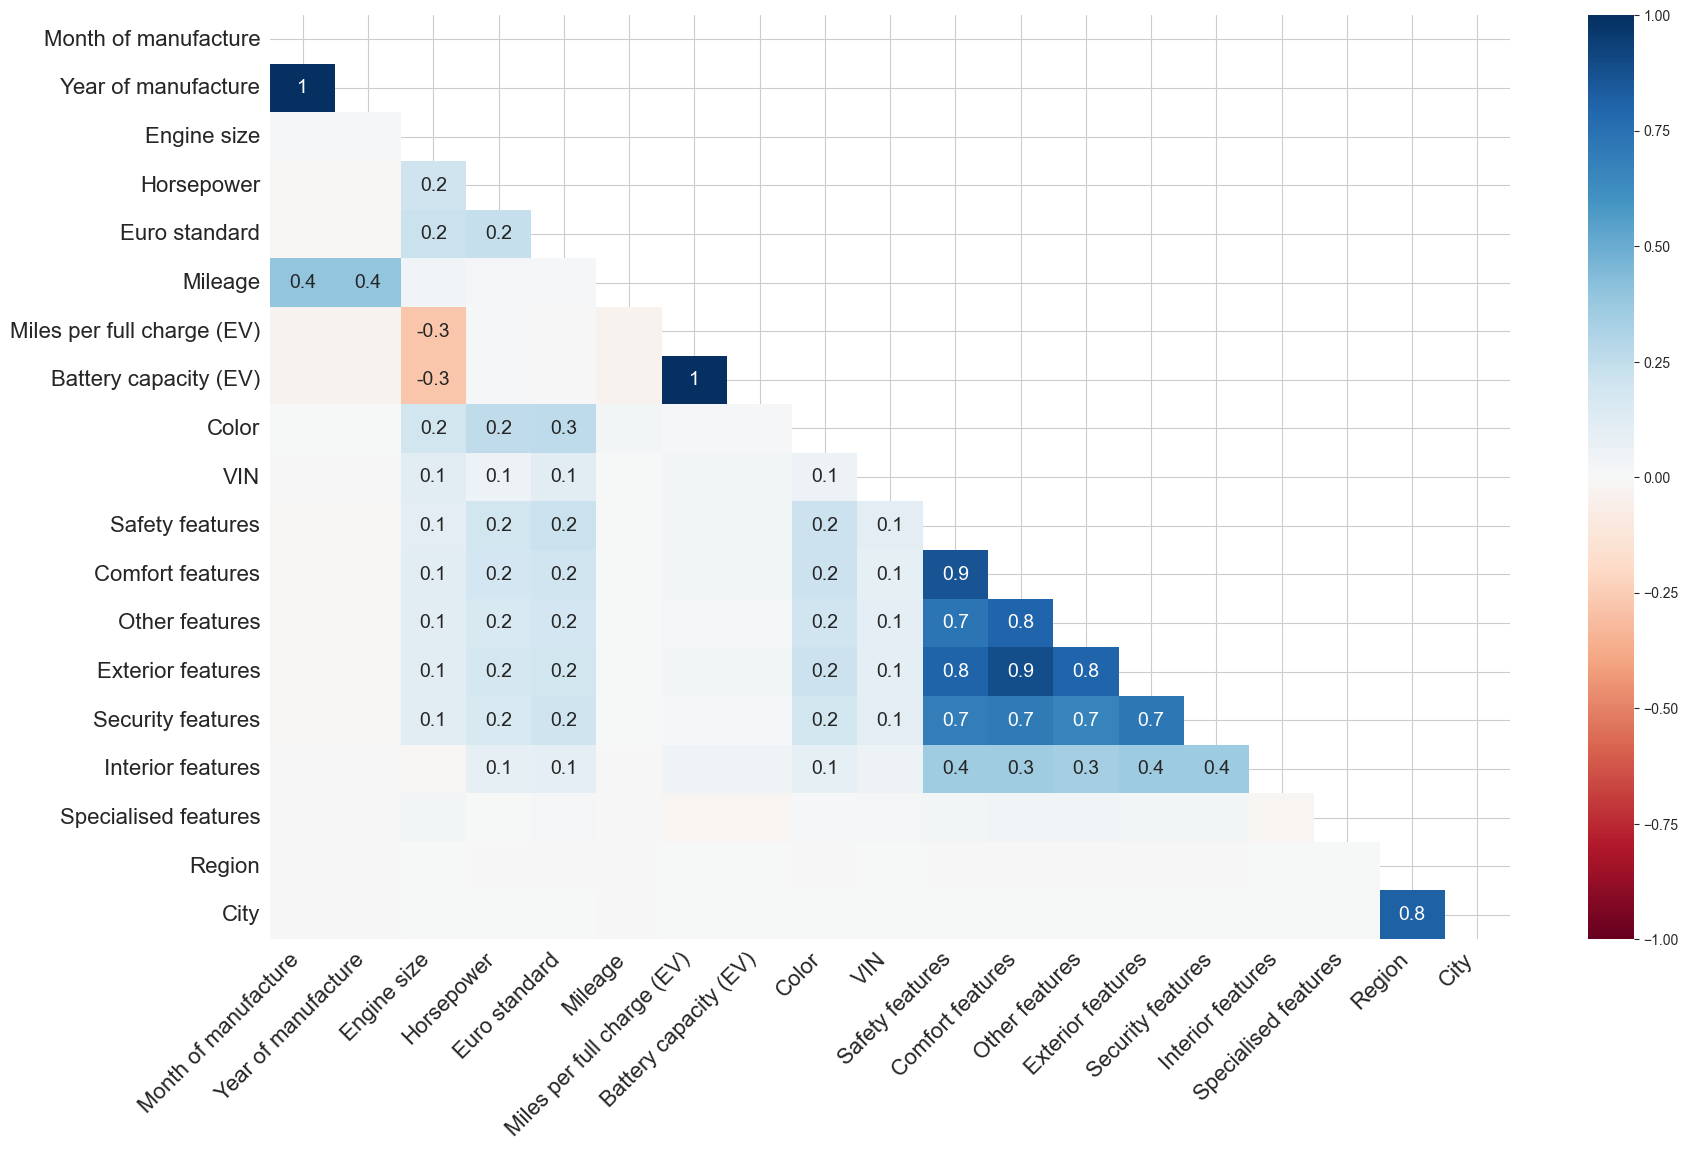

In [112]:
msno.heatmap(dataset)

# **Observations:**
* If engine size is present then EV features are not present and vice versa.
* EV features are always present together.
* If manufacturing dates are present then mileage is also present.
* Most of the time when any of the additional features columns (Other, Exterior, Interior) is present then the others are also present (author of the offer is lazy to fill them?).
* City and Region are almost always present together.

In [113]:
msno.dendrogram(dataset)

<Axes: >

In [114]:
categorical_features = dataset.select_dtypes(include=[object])
categorical_features.columns

Index(['Make', 'Model', 'Body type', 'Fuel type', 'Transmission',
       'Euro standard', 'Color', 'VIN', 'Price', 'Safety features',
       'Comfort features', 'Other features', 'Exterior features',
       'Security features', 'Interior features', 'Specialised features',
       'Region', 'City', 'Offer title'],
      dtype='object')

In [115]:
numerical_features = dataset.select_dtypes(include=[np.number])
numerical_features.columns

Index(['Month of manufacture', 'Year of manufacture', 'Engine size',
       'Horsepower', 'Mileage', 'Miles per full charge (EV)',
       'Battery capacity (EV)', 'View count'],
      dtype='object')

## Target feature - Price

In [116]:
# Make Price column numerical
y = dataset['Price']

y.value_counts()

Price
6500             888
При запитване    823
5500             811
7500             769
8500             764
                ... 
271999             1
279683.69          1
15333              1
28199              1
22295              1
Name: count, Length: 7017, dtype: int64

In [117]:
price_non_numeric_rows = dataset[~dataset['Price'].str.isdigit()]

In [118]:
dataset[dataset['Price'].str.contains('При запитване', case=False)]

Make    Model       Body type  Month of manufacture  \
165             Opel    Combo           Пикап                  1.00   
166             Opel    Combo         Миниван                  9.00   
167             Opel    Combo           Пикап                  1.00   
231             Ford     F250           Пикап                  1.00   
1158             BMW       X3            Джип                 11.00   
...              ...      ...             ...                   ...   
98309  Mercedes-Benz    S 560  Стреч лимузина                  9.00   
98310  Mercedes-Benz    S 560           Седан                 10.00   
98587  Mercedes-Benz      190           Седан                  8.00   
98588  Mercedes-Benz      190           Седан                 11.00   
99037         Toyota  Sequoia            Джип                  9.00   

       Year of manufacture Fuel type Transmission  Engine size  Horsepower  \
165                2012.00   Дизелов        Ръчна      1300.00       75.00   
166                2006.00  Бензинов        Ръчна          NaN       97.00   
167                2015.00   Дизелов        Ръчна      1600.00         NaN   
231                2009.00   Дизелов  Автоматична      6400.00      380.00   
1158               2008.00   Дизелов        Ръчна      2000.00      150.00   
...                    ...       ...          ...          ...         ...   
98309              2019.00  Бензинов  Автоматична          NaN         NaN   
98310              2017.00  Бензинов  Автоматична          NaN      469.00   
98587              1991.00  Бензинов        Ръчна          NaN      109.00   
98588              1988.00  Бензинов        Ръчна      2000.00      120.00   
99037              2023.00  Хибриден  Автоматична      3498.00      437.00   

      Euro standard  ...                                   Comfort features  \
165             NaN  ...  Ел. Огледала, Ел. Стъкла, Регулиране на волана...   
166          Евро 4  ...  Bluetooth \ handsfree система, DVD, TV, USB, a...   
167          Евро 5  ...  USB, audio\video, IN\AUX изводи, Ел. Огледала,...   
231          Евро 5  ...                                                NaN   
1158         Евро 4  ...  Bluetooth \ handsfree система, Блокаж на дифер...   
...             ...  ...                                                ...   
98309           NaN  ...                                                NaN   
98310        Евро 6  ...  Auto Start Stop function, Bluetooth \ handsfre...   
98587        Евро 1  ...                                                NaN   
98588        Евро 1  ...                           Ел. Огледала, Ел. Стъкла   
99037        Евро 6  ...  Auto Start Stop function, Bluetooth \ handsfre...   

                                          Other features  \
165                                             Нов внос   
166                                      Метанова уредба   
167                Дълга база, Нов внос, Сервизна книжка   
231                                                  NaN   
1158   4x4, Бартер, Капариран\Продаден, Лизинг, Нов внос   
...                                                  ...   
98309                                                NaN   
98310  4x4, Бартер, Дълга база, Лизинг, С регистрация...   
98587                                                NaN   
98588                       Газова уредба, С регистрация   
99037  4x4, 7 места, Капариран\Продаден, Напълно обсл...   

                                       Exterior features  \
165                                           4(5) Врати   
166                              4(5) Врати, Лети джанти   
167                                           4(5) Врати   
231                                                  NaN   
1158   4(5) Врати, Ксенонови фарове, Лети джанти, Мет...   
...                                                  ...   
98309                                                NaN   
98310  4(5) Врати, LED фарове, Лети джанти, Металик, ...   
98587           

In [119]:
non_numeric_price_counts = price_non_numeric_rows['Price'].value_counts().reset_index()
non_numeric_price_counts.columns = ['Price', 'Count']

non_numeric_price_counts

Price  Count
0          При запитване    823
1              107570.65     23
2               68454.05     22
3               48895.75     20
4      88012.34999999999     20
...                  ...    ...
1105           246434.58      1
1106        258167.60417      1
1107           279683.69      1
1108         37178.37247      1
1109  120281.58916999999      1

[1110 rows x 2 columns]

<Axes: xlabel='Price', ylabel='Count'>

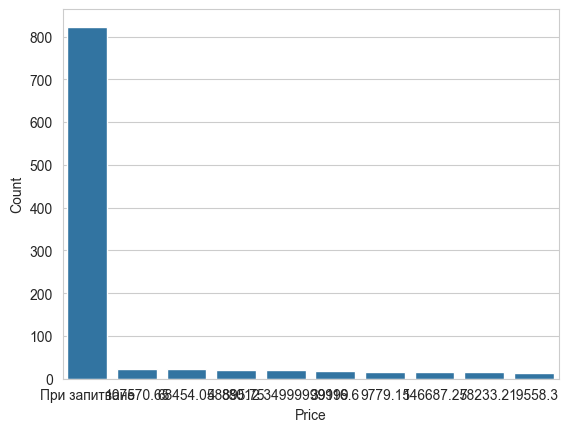

In [120]:
sns.barplot(x='Price', y='Count', data=non_numeric_price_counts.head(10))

In [121]:
prepared_dataset = dataset.copy()

# Remove currency symbols
prepared_dataset['Price'] = prepared_dataset['Price'].str.replace('USD', '').str.replace('EUR', '')

# Replace 'При запитване' with NaN
prepared_dataset.loc[prepared_dataset['Price'] == 'При запитване', 'Price'] = np.nan

# Convert to float in order to fill NaN values
prepared_dataset['Price'] = prepared_dataset['Price'].astype('float64')

# Fill NaN values with the mean by model
prepared_dataset['Price'] = prepared_dataset.groupby('Model')['Price'].transform(lambda x: x.fillna(x.mean()))

prepared_dataset['Price'].value_counts(dropna=False)

Price
6500.00      888
5500.00      812
7500.00      769
8500.00      764
10500.00     707
            ... 
10334.00       1
4332.00        1
180980.00      1
184340.00      1
22295.00       1
Name: count, Length: 7353, dtype: int64

In [122]:
prepared_dataset['Price'].isna().sum()

np.int64(3)

In [123]:
prepared_dataset[prepared_dataset['Price'].isna()]

Make   Model Body type  Month of manufacture  Year of manufacture  \
6447     Kia      K9     Седан                  2.00              2015.00   
46219    BMW  Izetta      Купе                 11.00              1958.00   
54620  Volga   Siber   Линейка                 12.00              1994.00   

      Fuel type Transmission  Engine size  Horsepower Euro standard  ...  \
6447   Бензинов  Автоматична      5038.00      420.00        Евро 6  ...   
46219  Бензинов        Ръчна          NaN       13.00        Евро 1  ...   
54620  Бензинов        Ръчна          NaN         NaN           NaN  ...   

                                        Comfort features  \
6447   Bluetooth \ handsfree система, USB, audio\vide...   
46219                                                NaN   
54620                                                NaN   

              Other features  \
6447   Бартер, С регистрация   
46219                    NaN   
54620                    NaN   

                                       Exterior features Security features  \
6447   LED фарове, Лети джанти, Металик, Панорамен лю...               NaN   
46219                                                NaN               NaN   
54620                                                NaN               NaN   

      Interior features  Specialised features   Region         City  \
6447        Кожен салон                   NaN  Пловдив  гр. Карлово   
46219               NaN                   NaN    София    гр. София   
54620               NaN                   NaN    София          NaN   

      View count            Offer title  
6447        3171   Kia K9 Luxury 5.0 V8  
46219       1180         BMW Izetta 250  
54620      76955  Volga Siber ГАЗ 31023  

[3 rows x 27 columns]

In [124]:
# Drop rows still with nan Price
prepared_dataset = prepared_dataset.dropna(subset=['Price'])

prepared_dataset['Price'].notna().sum()

np.int64(99799)

In [125]:
prepared_dataset['Price'].isna().sum()

np.int64(0)

In [126]:
prepared_dataset[prepared_dataset['Price'] == 'При запитване']

Empty DataFrame
Columns: [Make, Model, Body type, Month of manufacture, Year of manufacture, Fuel type, Transmission, Engine size, Horsepower, Euro standard, Mileage, Miles per full charge (EV), Battery capacity (EV), Color, VIN, Price, Safety features, Comfort features, Other features, Exterior features, Security features, Interior features, Specialised features, Region, City, View count, Offer title]
Index: []

[0 rows x 27 columns]

In [127]:
prepared_dataset['Price'].value_counts(dropna=False)

Price
6500.00     888
5500.00     812
7500.00     769
8500.00     764
10500.00    707
           ... 
29888.00      1
35926.00      1
41333.00      1
44111.00      1
22295.00      1
Name: count, Length: 7352, dtype: int64

In [128]:
prepared_dataset['Price'].describe()

count      99799.00
mean       32173.21
std        90916.82
min           11.00
25%         7799.00
50%        15000.00
75%        33000.00
max     19558298.04
Name: Price, dtype: float64

In [129]:
prepared_dataset['Price'].dtype

dtype('float64')

## Decision Tree Regressor with no preprocessing

In [130]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

Y = prepared_dataset['Price']
X = prepared_dataset.drop(columns=['Price'])

categorical_features = X.select_dtypes(include=[object])
numerical_features = X.select_dtypes(include=[np.number])

ordinal_encoder = OrdinalEncoder()

column_transformer = ColumnTransformer([
    ('categorical', ordinal_encoder, categorical_features.columns)
], remainder='passthrough')

X = column_transformer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

(0.290425171702825, 0.2526432483339227)

In [134]:
def plot_tree_depth_scores(X_train, y_train, X_test, y_test, depth_range):
    train_scores = []
    test_scores = []

    for i in depth_range:
        model = DecisionTreeRegressor(max_depth=i)
        model.fit(X_train, y_train)
        train_scores.append(model.score(X_train, y_train))
        test_scores.append(model.score(X_test, y_test))

    plt.plot(depth_range, train_scores, label='Train')
    plt.plot(depth_range, test_scores, label='Test')
    plt.xlabel('Max Depth')
    plt.ylabel('Score')
    plt.legend()
    plt.show()

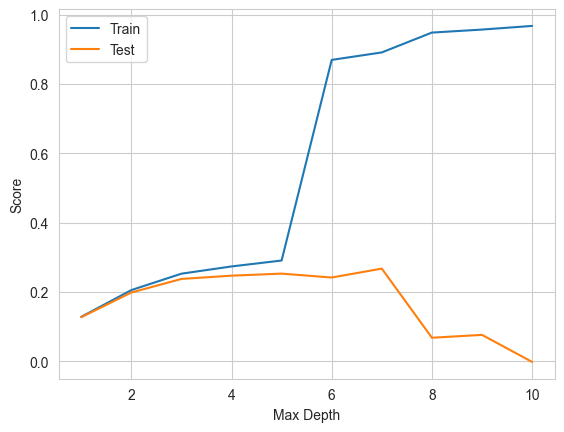

In [135]:
plot_tree_depth_scores(X_train, y_train, X_test, y_test, range(1, 11))

In [136]:
tree_model = DecisionTreeRegressor(max_depth=7)

tree_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=7)

In [137]:
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_error

y_pred = tree_model.predict(X_test)

print('Root Mean Squared Error: ', root_mean_squared_error(y_test, y_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))

Root Mean Squared Error:  80996.77523627634
Mean Absolute Error:  9884.730386434787


In [146]:
from sklearn.tree import plot_tree

tree_fig = plt.figure(figsize=(300,50))

plot_tree(tree_model, filled=True, feature_names=prepared_dataset.columns.drop('Price'), fontsize=10)
plt.savefig('./decision_tree_no_prep.png')

plt.show()

In [156]:
from pandas import DataFrame
from sklearn.inspection import permutation_importance

feature_importances = DataFrame(
    columns=['Feature', 'Importance', 'Permutation Importance'], 
    data=zip(prepared_dataset.columns.drop('Price'), tree_model.feature_importances_, permutation_importance(tree_model, X_test, y_test, random_state=42, n_repeats=10).importances_mean))

feature_importances.sort_values(by='Importance', ascending=False)

Feature  Importance  Permutation Importance
11  Miles per full charge (EV)        0.64                    0.25
21        Specialised features        0.21                    0.87
19           Security features        0.06                    0.12
22                      Region        0.06                   -0.07
0                         Make        0.01                   -0.02
17              Other features        0.01                    0.02
25                 Offer title        0.00                   -0.13
9                Euro standard        0.00                    0.01
24                  View count        0.00                    0.00
4          Year of manufacture        0.00                    0.00
3         Month of manufacture        0.00                    0.00
1                        Model        0.00                    0.01
20           Interior features        0.00                    0.00
10                     Mileage        0.00                    0.00
2                    Body type        0.00                    0.00
7                  Engine size        0.00                    0.00
23                        City        0.00                    0.00
15             Safety features        0.00                    0.00
18           Exterior features        0.00                   -0.00
16            Comfort features        0.00                    0.00
13                       Color        0.00                    0.00
8                   Horsepower        0.00                    0.00
5                    Fuel type        0.00                    0.00
14                         VIN        0.00                    0.00
12       Battery capacity (EV)        0.00                    0.00
6                 Transmission        0.00                    0.00

<Axes: title={'center': 'Feature Importances'}, xlabel='Value', ylabel='Feature'>

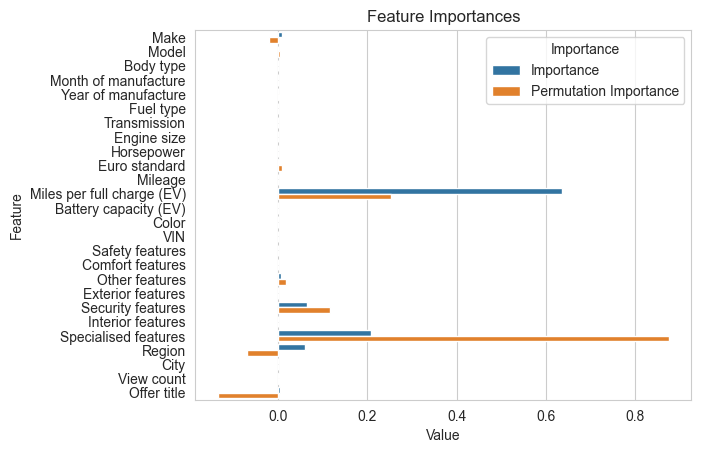

In [192]:
data = feature_importances.melt(id_vars='Feature', var_name='Importance', value_vars=['Importance', 'Permutation Importance'])

plt.title('Feature Importances')
plt.xlabel('Value')

sns.barplot(x='value', data=data, hue='Importance', y='Feature', orient='h')

In [ ]:
prepared_dataset.iloc[prepared_dataset['Price'].argmax()]

WOW! A Camaro for 20 Million Leva! Well that's an outlier if I've ever seen one!

In [ ]:
prepared_dataset['Price'] = prepared_dataset['Price'].round()

prepared_dataset['Price'].describe()

In [ ]:
prepared_dataset.sample(20)

In [ ]:
numerical_columns_skewness = dataset[numerical_features.columns].skew().sort_values(ascending=False)
numerical_columns_skewness

In [ ]:
# Initialize a figure
plt.figure(figsize=(20, 15))

# Number of rows/columns in the grid
n_cols = 3  # Adjust based on preference
n_rows = int(np.ceil(len(numerical_features.columns) / float(n_cols)))

# Create a subplot for each numerical feature
for i, column in enumerate(numerical_features.columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(dataset[column], kde=True, stat="count", linewidth=0)
    plt.title(column)

plt.tight_layout()
plt.show()

In [ ]:
numerical_columns_skewness

In [ ]:
numerical_columns_kurtosis = dataset[numerical_features.columns].kurt().sort_values(ascending=False)
numerical_columns_kurtosis